## Data Visualization and Pareto Front Exploration

In [15]:

import json
import pandas as pd
import matplotlib.pyplot as plt
file_name="metrics.json"
file=open(file_name,"r")
data=json.load(file)

data_frame=pd.DataFrame(data)
keys=list(data_frame["cifar10"].keys())
data_frame.head()

,cifar10,cifar100,ImageNet16-120
0,"{'fpga_latency': 2.57296, 'accuracy': 85.86333...",NaN,NaN
3,"{'fpga_latency': 1.54256, 'accuracy': 86.61666...",NaN,NaN
4,"{'fpga_latency': 2.16336, 'accuracy': 88.21666...",NaN,NaN
8,"{'fpga_latency': 3.31536, 'accuracy': 92.09666...",NaN,NaN
9,"{'fpga_latency': 2.80016, 'accuracy': 86.44333...",NaN,NaN


In [16]:
config=open("config.json","r")
json.load(config)

{'dataset': ['cifar10'],
 'edgegpu_latency': 0.0001,
 'edgegpu_energy': 24.226614330768584,
 'raspi4_latency': 10.481976820010459,
 'edgetpu_latency': 0.9571811309997429,
 'pixel3_latency': 3.6058499999999998,
 'eyeriss_latency': 3.645620000000001,
 'eyeriss_energy': 0.6872827644999999,
 'eyeriss_arithmetic_intensity': 6.289297634665844,
 'fpga_latency': 3.72496,
 'fpga_energy': 18.01072,
 'average_hw_metric': 591005.8676719831,
 'train_accuracy': 0.99998,
 'train_loss': 0.0,
 'validation_accuracy': 0.95,
 'validation_loss': 0.0}

In [17]:
print(f"Original Number of architectures: {15625}\nAfter configration Number of architectures: {len(data_frame)}")

Original Number of architectures: 15625
After configration Number of architectures: 8311


In [18]:
data_name=["cifar10"]
cifar10_keys=(data["cifar10"].keys())
cifar100_keys=(data["cifar100"].keys())
ImageNet_keys=(data["ImageNet16-120"].keys())
latency=[]
val_accuracy=[]
for  dataset in data_name:
    for key in data[dataset].keys():
        latency.append(data[dataset][key]["fpga_latency"])
        val_accuracy.append(data[dataset][key]["accuracy"])

In [19]:
def calculate_lr_decay(lr,decay
                       ,epoch):
    lr_decay=[]
    for i in (epoch):
        lr=lr*decay
        lr_decay.append(lr)
    return lr_decay

steps=10,20,30,40,50,60,70,80,90,100,110,120,130,140,150
calculate_lr_decay(0.001,0.80,steps)

[0.0008,
 0.00064,
 0.0005120000000000001,
 0.0004096000000000001,
 0.0003276800000000001,
 0.0002621440000000001,
 0.00020971520000000012,
 0.0001677721600000001,
 0.00013421772800000008,
 0.00010737418240000007,
 8.589934592000007e-05,
 6.871947673600006e-05,
 5.497558138880005e-05,
 4.3980465111040044e-05,
 3.5184372088832036e-05]

In [21]:
len(val_accuracy),len(latency),len(keys)

(8311, 8311, 8311)

In [25]:
import pandas as pd


df = pd.DataFrame({'accuracy': val_accuracy, 'latency': latency})
# Assuming you have a DataFrame called df and a list of integers called index_list
keys=[int(key) for key in keys]
df.set_index(pd.Index(keys), inplace=True)
df.head()

,accuracy,latency
0,85.863333,2.57296
3,86.616667,1.54256
4,88.216667,2.16336
8,92.096667,3.31536
9,86.443333,2.80016


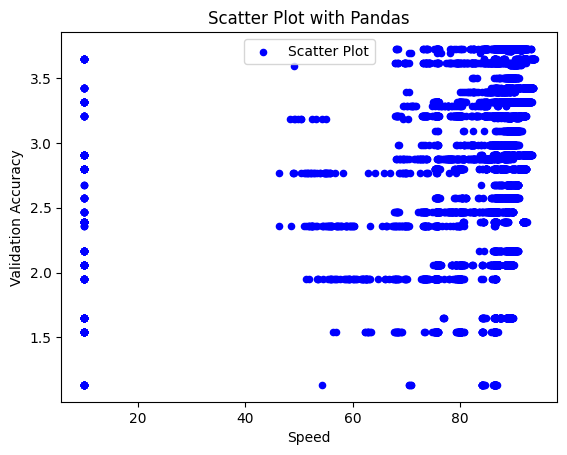

In [9]:
df.plot.scatter(x="accuracy", y='latency', color='blue', marker='o', label='Scatter Plot')
# Add labels and title
plt.xlabel('Speed')
plt.ylabel("Validation Accuracy")
plt.title('Scatter Plot with Pandas')

# Show legend
plt.legend()

# Show the plot
plt.show()

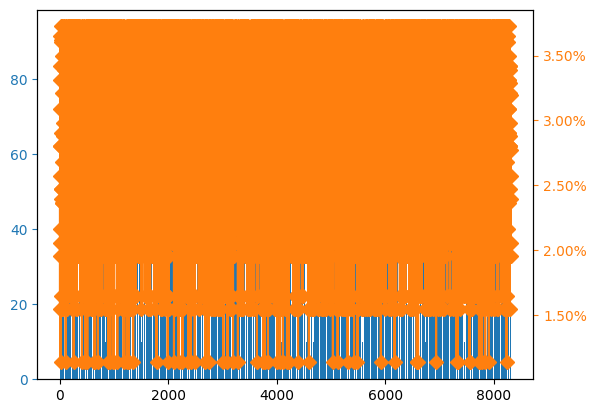

In [10]:
"""
    Histrogram Style pareto front 
"""
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots()
ax.bar(df.index, df["accuracy"], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df["latency"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Highest point on both axis(3960     2.16336
4384     1.13296
4659     2.90576
8720     1.64816
10431    1.54256
11472    3.64816
13611    2.39056
13987    3.42096
14346    2.05776
Name: latency, dtype: float64, 3960     90.830000
4384     86.796667
4659     93.396667
8720     89.875000
10431    87.000000
11472    93.910000
13611    92.490000
13987    93.596667
14346    89.986667
Name: accuracy, dtype: float64)


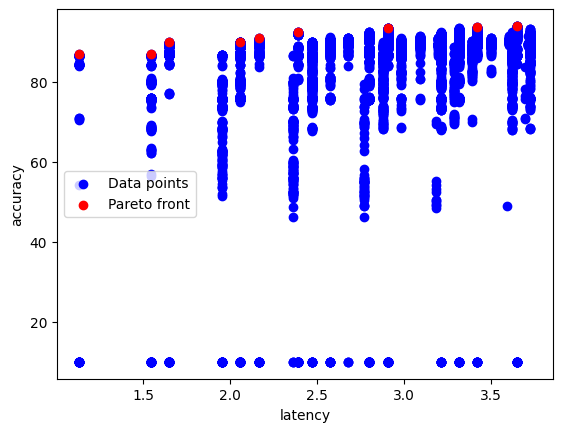

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from paretoset import paretoset

# Load the data frame from a csv file

# Get the columns to plot
x = df["latency"]
y = df["accuracy"]

# Find the Pareto eff^icient points
pareto = paretoset(df[[x.name, y.name]], sense=["min", "max"])
# Plot the data points and the Pareto front
print(f"Highest point on both axis{x[pareto],y[pareto]}")
plt.scatter(x, y, color="blue", label="Data points")
plt.scatter(x[pareto], y[pareto], color="red", label="Pareto front")
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.legend()
plt.show()

In [31]:
seleted_network= list(x[pareto].keys())
with open("seleted_network.json","w") as f:
    json.dump(seleted_network,f)

In [32]:
data["cifar10"].update(seleted_network)


[3960, 4384, 4659, 8720, 10431, 11472, 13611, 13987, 14346]

In [34]:
y[pareto]

3960     90.830000
4384     86.796667
4659     93.396667
8720     89.875000
10431    87.000000
11472    93.910000
13611    92.490000
13987    93.596667
14346    89.986667
Name: accuracy, dtype: float64

,cifar10,cifar100,ImageNet16-120
0,"{'fpga_latency': 2.57296, 'accuracy': 85.86333...",NaN,NaN
3,"{'fpga_latency': 1.54256, 'accuracy': 86.61666...",NaN,NaN
4,"{'fpga_latency': 2.16336, 'accuracy': 88.21666...",NaN,NaN
8,"{'fpga_latency': 3.31536, 'accuracy': 92.09666...",NaN,NaN
9,"{'fpga_latency': 2.80016, 'accuracy': 86.44333...",NaN,NaN
...,...,...,...
15614,"{'fpga_latency': 2.39056, 'accuracy': 10.0}",NaN,NaN
15618,"{'fpga_latency': 2.05776, 'accuracy': 75.70666...",NaN,NaN
15620,"{'fpga_latency': 1.95216, 'accuracy': 86.44666...",NaN,NaN
15623,"{'fpga_latency': 2.77136, 'accuracy': 69.98333...",NaN,NaN


In [10]:
def find_point_json_file(file_name):
    file=open(file_name,"r")
    data=json.load(file)
    df=pd.DataFrame(data)
    x = df["Speed"]
    y = df["Validation Accuracy"]
    pareto = paretoset(df[[x.name, y.name]], sense=["max", "max"])
    return x[pareto],y[pareto]

In [37]:
def write_json_file(file_name,data):
    with open(file_name, 'a') as outfile:
        json.dump(data, outfile)
    return

In [35]:
x[pareto]

3960     2.16336
4384     1.13296
4659     2.90576
8720     1.64816
10431    1.54256
11472    3.64816
13611    2.39056
13987    3.42096
14346    2.05776
Name: latency, dtype: float64

In [48]:
import json

# Load the original JSON file
with open('logging_2_ffcv.json', 'r') as original_file:
    original_data = json.load(original_file)

# Specify the validation accuracy threshold

# Initialize an empty list to store matching data
matching_data = []

# Iterate through the original data
for item in original_data:
    # Check if the validation accuracy meets the threshold
    for i in y[pareto]:
        if item['Validation Accuracy'] == i:
            # Add the matching data to the list
            matching_data.append(item["Sparcity_list"])

# Save the matching data to a separate JSON file
with open('matching_data.json', 'w') as matching_file:
    json.dump(matching_data, matching_file, indent=4)

print("Matching data successfully extracted and saved to 'matching_data.json'.")


Matching data successfully extracted and saved to 'matching_data.json'.


In [44]:
selected_list=[]
for i in range(0,len(data)):
    #for j in y[pareto]:
    if data[i]["Validation Accuracy"] in y[pareto]:
            selected_list.append(data[i]["Validation Accuracy"])
write_json_file("sparsity.json",selected_list)
        
            


KeyError: "None of [Index(['Train Loss', 'Validation Accuracy'], dtype='object')] are in the [columns]"

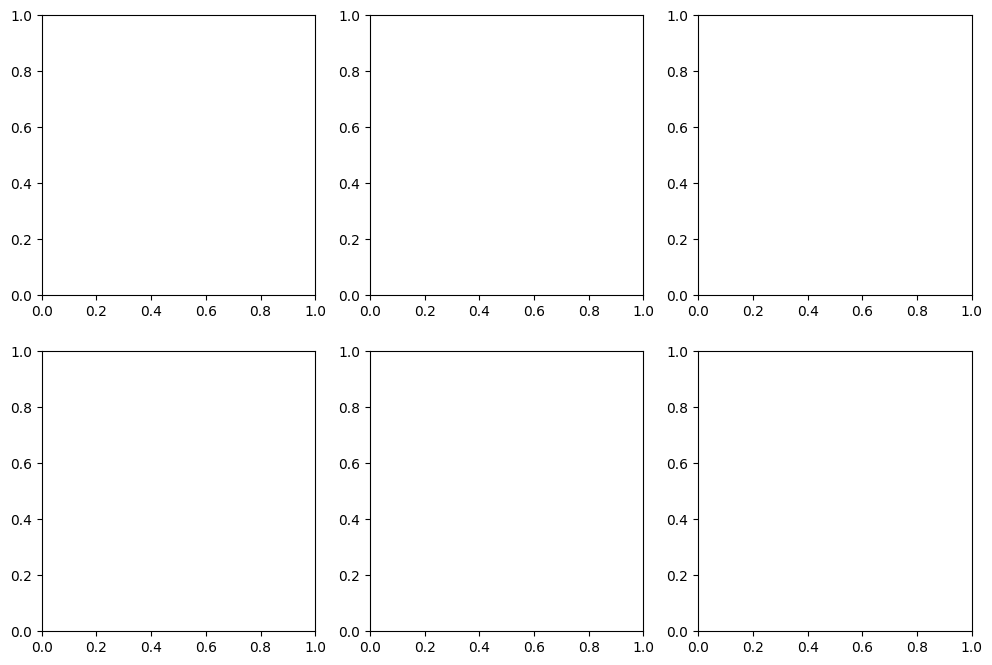

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from paretoset import paretoset

# Load the data frame from a csv file

# Define the columns to plot
columns = ["Train Loss", "Speed", "Validation Accuracy", "Validation Loss"]

# Define the sense of each column (min or max)
sense = ["min", "max", "max", "min"]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Loop through each pair of columns
for i, ax in enumerate(axes.flat):
    # Skip the last subplot
    if i == 5:
        break
    # Get the indices of the columns
    x_index = i // 2
    y_index = i % 2 + 2
    # Get the column names
    x = columns[x_index]
    y = columns[y_index]
    # Get the sense of the columns
    x_sense = sense[x_index]
    y_sense = sense[y_index]
    # Find the Pareto efficient points
    pareto = paretoset(df[[x, y]], sense=[x_sense, y_sense])
    # Plot the data points and the Pareto front
    ax.scatter(df[x], df[y], color="blue", label="Data points")
    ax.scatter(df[x][pareto], df[y][pareto], color="red", label="Pareto front")
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend()

# Adjust the layout and show the figure
fig.tight_layout()
plt.show()

In [5]:
import psutil
import os

def get_memory_usage():
    # Retrieve CPU memory usage
    cpu_percent = psutil.cpu_percent()

    # Retrieve GPU memory usage (if available)
    gpu_memory = 0
    if os.path.exists("/proc/driver/nvidia/0/utilization"):
        gpu_memory = psutil.get_gpus()[0].memory_free()

    # Gather memory usage of all processes
    process_memory = {}
    for process in psutil.process_iter():
        process_name = process.name()
        process_memory_usage = process.memory_info()[0]
        process_memory[process_name] = process_memory_usage

    # Display memory usage information
    print("CPU Memory Usage:", cpu_percent, "%")
    print("GPU Memory Usage:", gpu_memory, "MB")
    print("Process Memory Usage:")
    for process_name, process_memory_usage in process_memory.items():
        print(f"{process_name}: {round(process_memory_usage / 1024 / 1024, 2)} MB")

if __name__ == "__main__":
    get_memory_usage()


CPU Memory Usage: 16.7 %
GPU Memory Usage: 0 MB
Process Memory Usage:
systemd: 10.02 MB
kthreadd: 0.0 MB
rcu_gp: 0.0 MB
rcu_par_gp: 0.0 MB
slub_flushwq: 0.0 MB
netns: 0.0 MB
kworker/0:0H-events_highpri: 0.0 MB
mm_percpu_wq: 0.0 MB
rcu_tasks_rude_: 0.0 MB
rcu_tasks_trace: 0.0 MB
ksoftirqd/0: 0.0 MB
rcu_sched: 0.0 MB
migration/0: 0.0 MB
idle_inject/0: 0.0 MB
cpuhp/0: 0.0 MB
cpuhp/1: 0.0 MB
idle_inject/1: 0.0 MB
migration/1: 0.0 MB
ksoftirqd/1: 0.0 MB
kworker/1:0H-events_highpri: 0.0 MB
cpuhp/2: 0.0 MB
idle_inject/2: 0.0 MB
migration/2: 0.0 MB
ksoftirqd/2: 0.0 MB
kworker/2:0H-events_highpri: 0.0 MB
cpuhp/3: 0.0 MB
idle_inject/3: 0.0 MB
migration/3: 0.0 MB
ksoftirqd/3: 0.0 MB
kworker/3:0H-events_highpri: 0.0 MB
cpuhp/4: 0.0 MB
idle_inject/4: 0.0 MB
migration/4: 0.0 MB
ksoftirqd/4: 0.0 MB
kworker/4:0H-events_highpri: 0.0 MB
cpuhp/5: 0.0 MB
idle_inject/5: 0.0 MB
migration/5: 0.0 MB
ksoftirqd/5: 0.0 MB
kworker/5:0H-events_highpri: 0.0 MB
cpuhp/6: 0.0 MB
idle_inject/6: 0.0 MB
migration/6: 0.0 

In [2]:
!pip install psutil

In [10]:
import pympler.classtracker as ct
import pympler.summary as summary

def track_memory():
    # Start tracking memory usage
    ct.start()

    # Run your code
    # ...

    # Stop tracking memory usage and print a summary
    summary.print_summary()

if __name__ == "__main__":
    track_memory()


AttributeError: module 'pympler.classtracker' has no attribute 'start'

In [9]:
pip install --upgrade pympler

Note: you may need to restart the kernel to use updated packages.
